# 📊 Phân tích dữ liệu: Mối quan hệ giữa 'Vị trí thực hiện' và các yếu tố khác

Tập dữ liệu này được tổng hợp từ nhiều tòa nhà, tập trung phân tích theo chiều 'Vị trí thực hiện' để rút ra các insight hữu ích.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_excel("LLV_tong_hop_chuan_hoa.xlsx")

# # Chuyển HH:MM:SS sang phút
# df['Tổng thời gian thực hiện'] = pd.to_timedelta(df['Tổng thời gian thực hiện'], errors='coerce')
# df['Thời gian (phút)'] = df['Tổng thời gian thực hiện'].dt.total_seconds() / 60


In [3]:
df['Vị trí thực hiện'].value_counts()

Vị trí thực hiện
VT5                       275
VT4                       265
VT6                       264
VT2                       255
VT3                       250
VT7                       243
VT1                       241
VT8                       229
VT9                       226
VT10                      170
VT11                      168
VT12                      165
VT13                      153
VT14                      138
VT18                       81
VT17                       80
VT15                       66
VT16                       59
VT19                       49
VT20                       49
VT25                       41
VT23                       34
VT21                       34
VT22                       33
VT24                       30
VT26                       21
VT32                       13
VT29                        8
VT27                        6
VT28                        6
VT30                        6
VT31                        6
VT1,2,3,4,5,6,7,8,9,10 

## Phân tích 1: Top 10 vị trí thực hiện nhiều công việc nhất

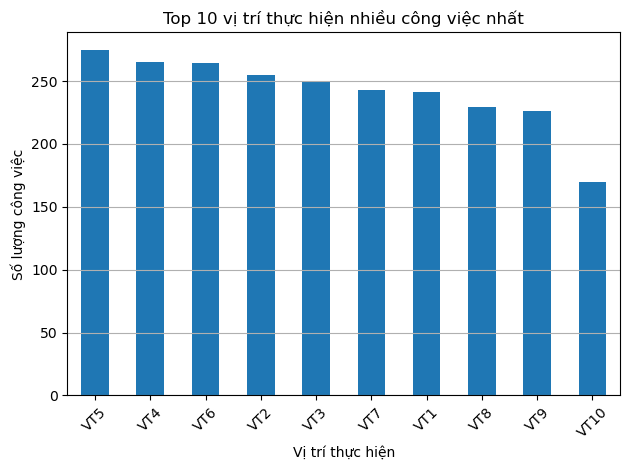

In [2]:

top_vitri = df['Vị trí thực hiện'].value_counts().head(10)
top_vitri.plot(kind='bar', title='Top 10 vị trí thực hiện nhiều công việc nhất')
plt.xlabel('Vị trí thực hiện')
plt.ylabel('Số lượng công việc')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\tainl\AppData\Local\Temp\ipykernel_33996\563508294.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vt_counts.index, y=vt_counts.values, palette="Blues_d")


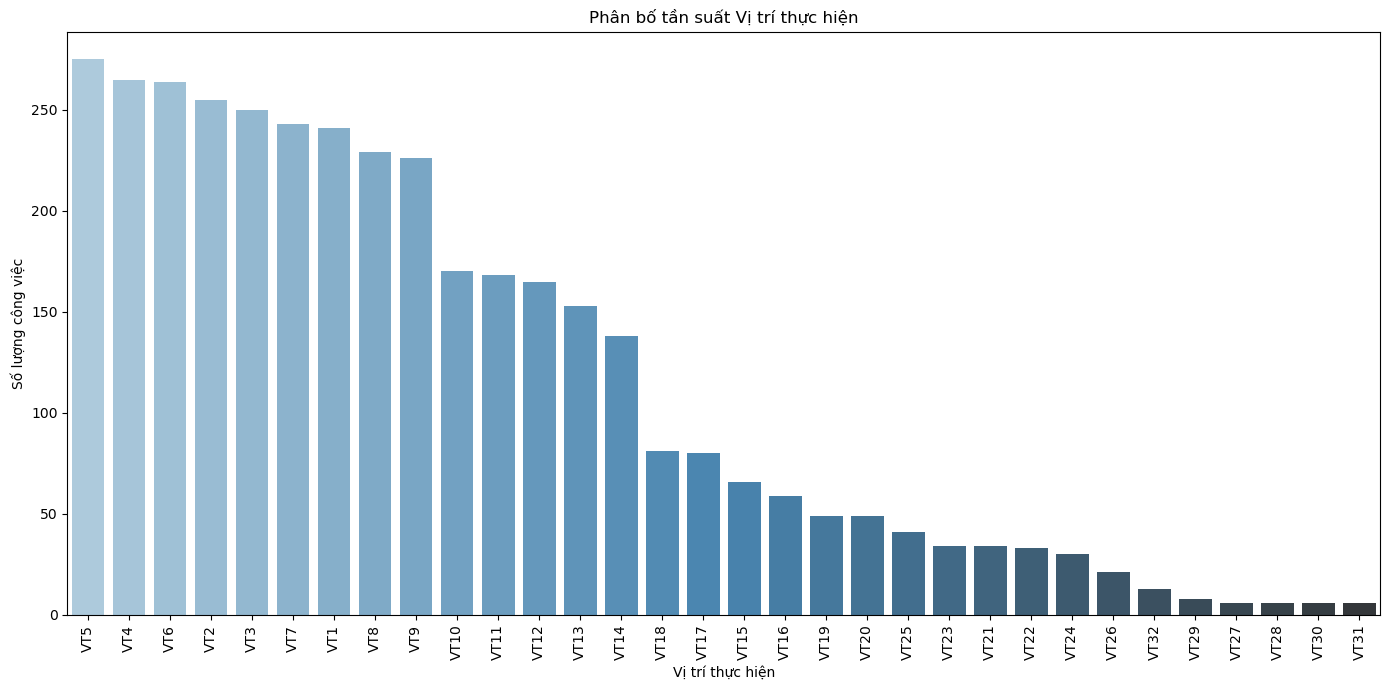

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel("LLV_tong_hop_chuan_hoa.xlsx")

# --- 1. Đếm số lượng mỗi Vị trí ---
vt_counts = df["Vị trí thực hiện"].value_counts()

# --- 2. Loại bỏ 2 giá trị cuối ---
to_remove = ["VT1,2,3,4,5,6,7,8,9,10", "VT1,2,3,4,5,6"]
vt_counts = vt_counts[~vt_counts.index.isin(to_remove)]

# --- 3. Vẽ biểu đồ ---
plt.figure(figsize=(14,7))
sns.barplot(x=vt_counts.index, y=vt_counts.values, palette="Blues_d")

plt.xticks(rotation=90)
plt.xlabel("Vị trí thực hiện")
plt.ylabel("Số lượng công việc")
plt.title("Phân bố tần suất Vị trí thực hiện")
plt.tight_layout()
plt.show()


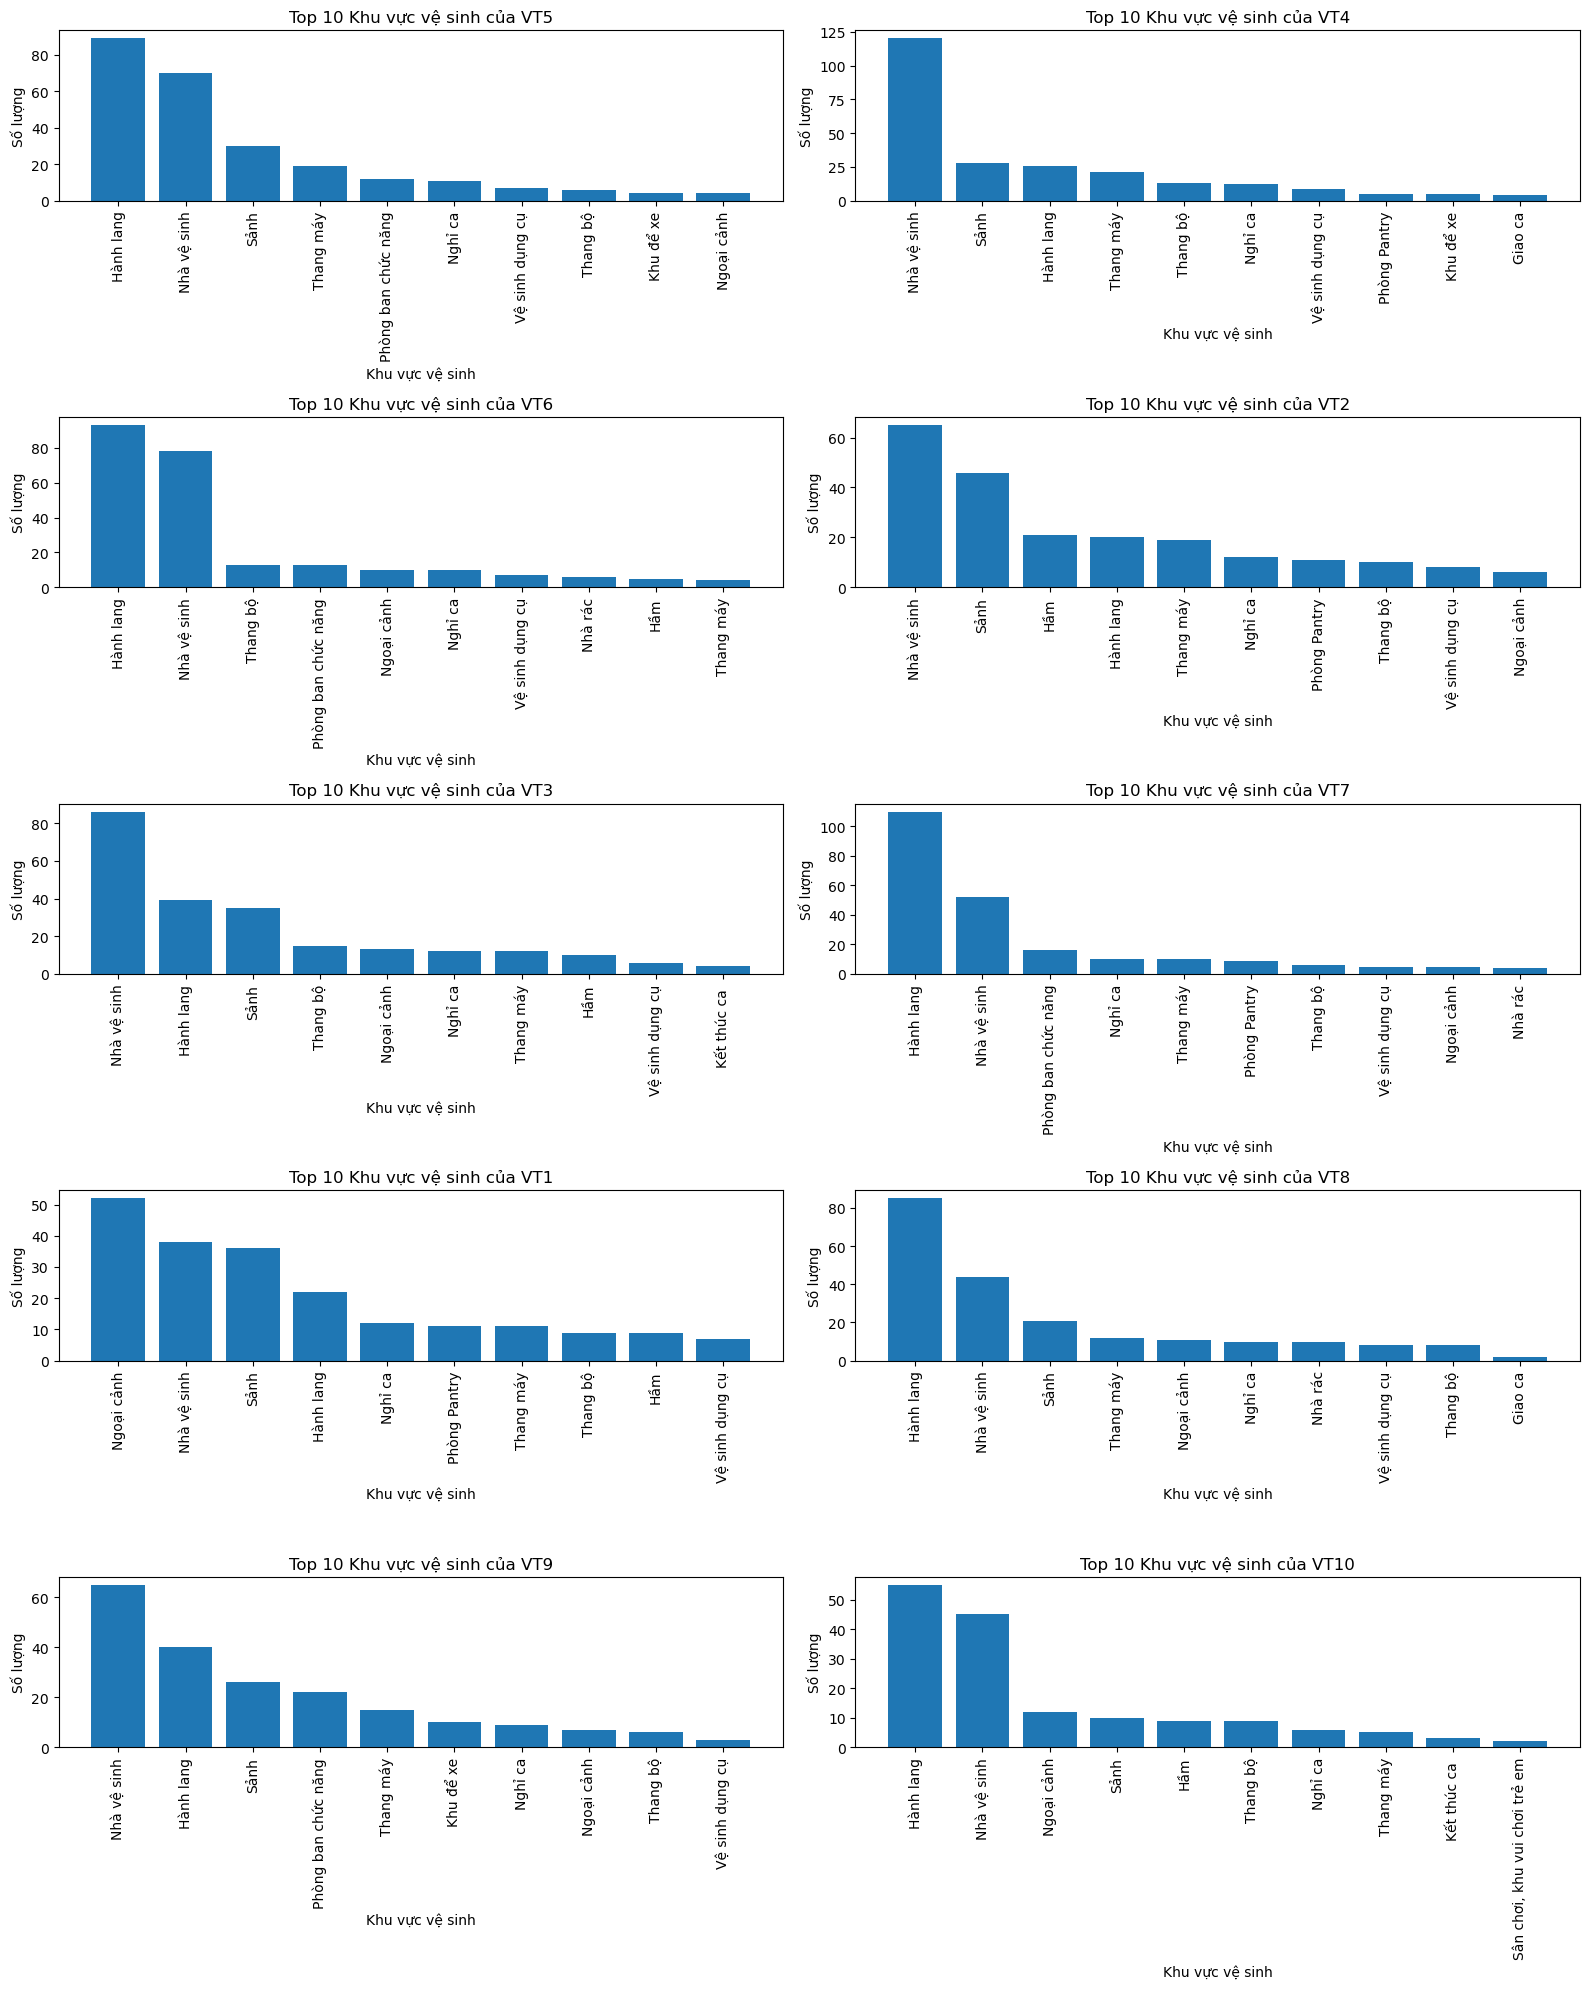

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
# df = pd.read_excel("/mnt/data/LLV_tong_hop_chuan_hoa.xlsx")

# 1) Lấy TOP 10 vị trí thực hiện nhiều nhất
top10_positions = df["Vị trí thực hiện"].value_counts().head(10).index

# Lọc dữ liệu theo 10 vị trí này
df_top = df[df["Vị trí thực hiện"].isin(top10_positions)]

# 2) Tạo biểu đồ: với mỗi vị trí → lấy top 10 khu vực vệ sinh của vị trí đó
fig, axes = plt.subplots(5, 2, figsize=(16, 20))  # 10 biểu đồ nhỏ
axes = axes.flatten()

for i, pos in enumerate(top10_positions):
    df_pos = df_top[df_top["Vị trí thực hiện"] == pos]
    
    # Lấy top 10 khu vực vệ sinh của vị trí này
    top10_areas = df_pos["Khu vực vệ sinh"].value_counts().head(10)
    
    ax = axes[i]
    ax.bar(top10_areas.index, top10_areas.values)
    ax.set_title(f"Top 10 Khu vực vệ sinh của {pos}")
    ax.set_xlabel("Khu vực vệ sinh")
    ax.set_ylabel("Số lượng")
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [6]:
df["Hạng mục vệ sinh"].value_counts()

Hạng mục vệ sinh
Tổng thể các hạng mục                    1075
Sàn                                      1011
Trang thiết bị                            264
Vệ sinh dụng cụ                           160
Nghỉ ca                                   157
                                         ... 
Trang thiết bị, Tổng thể các hạng mục       1
Sàn, Rãnh thoát nước nổi                    1
Bể tiểu cảnh                                1
Tường, Sàn                                  1
Sàn, Cửa, Tường                             1
Name: count, Length: 65, dtype: int64

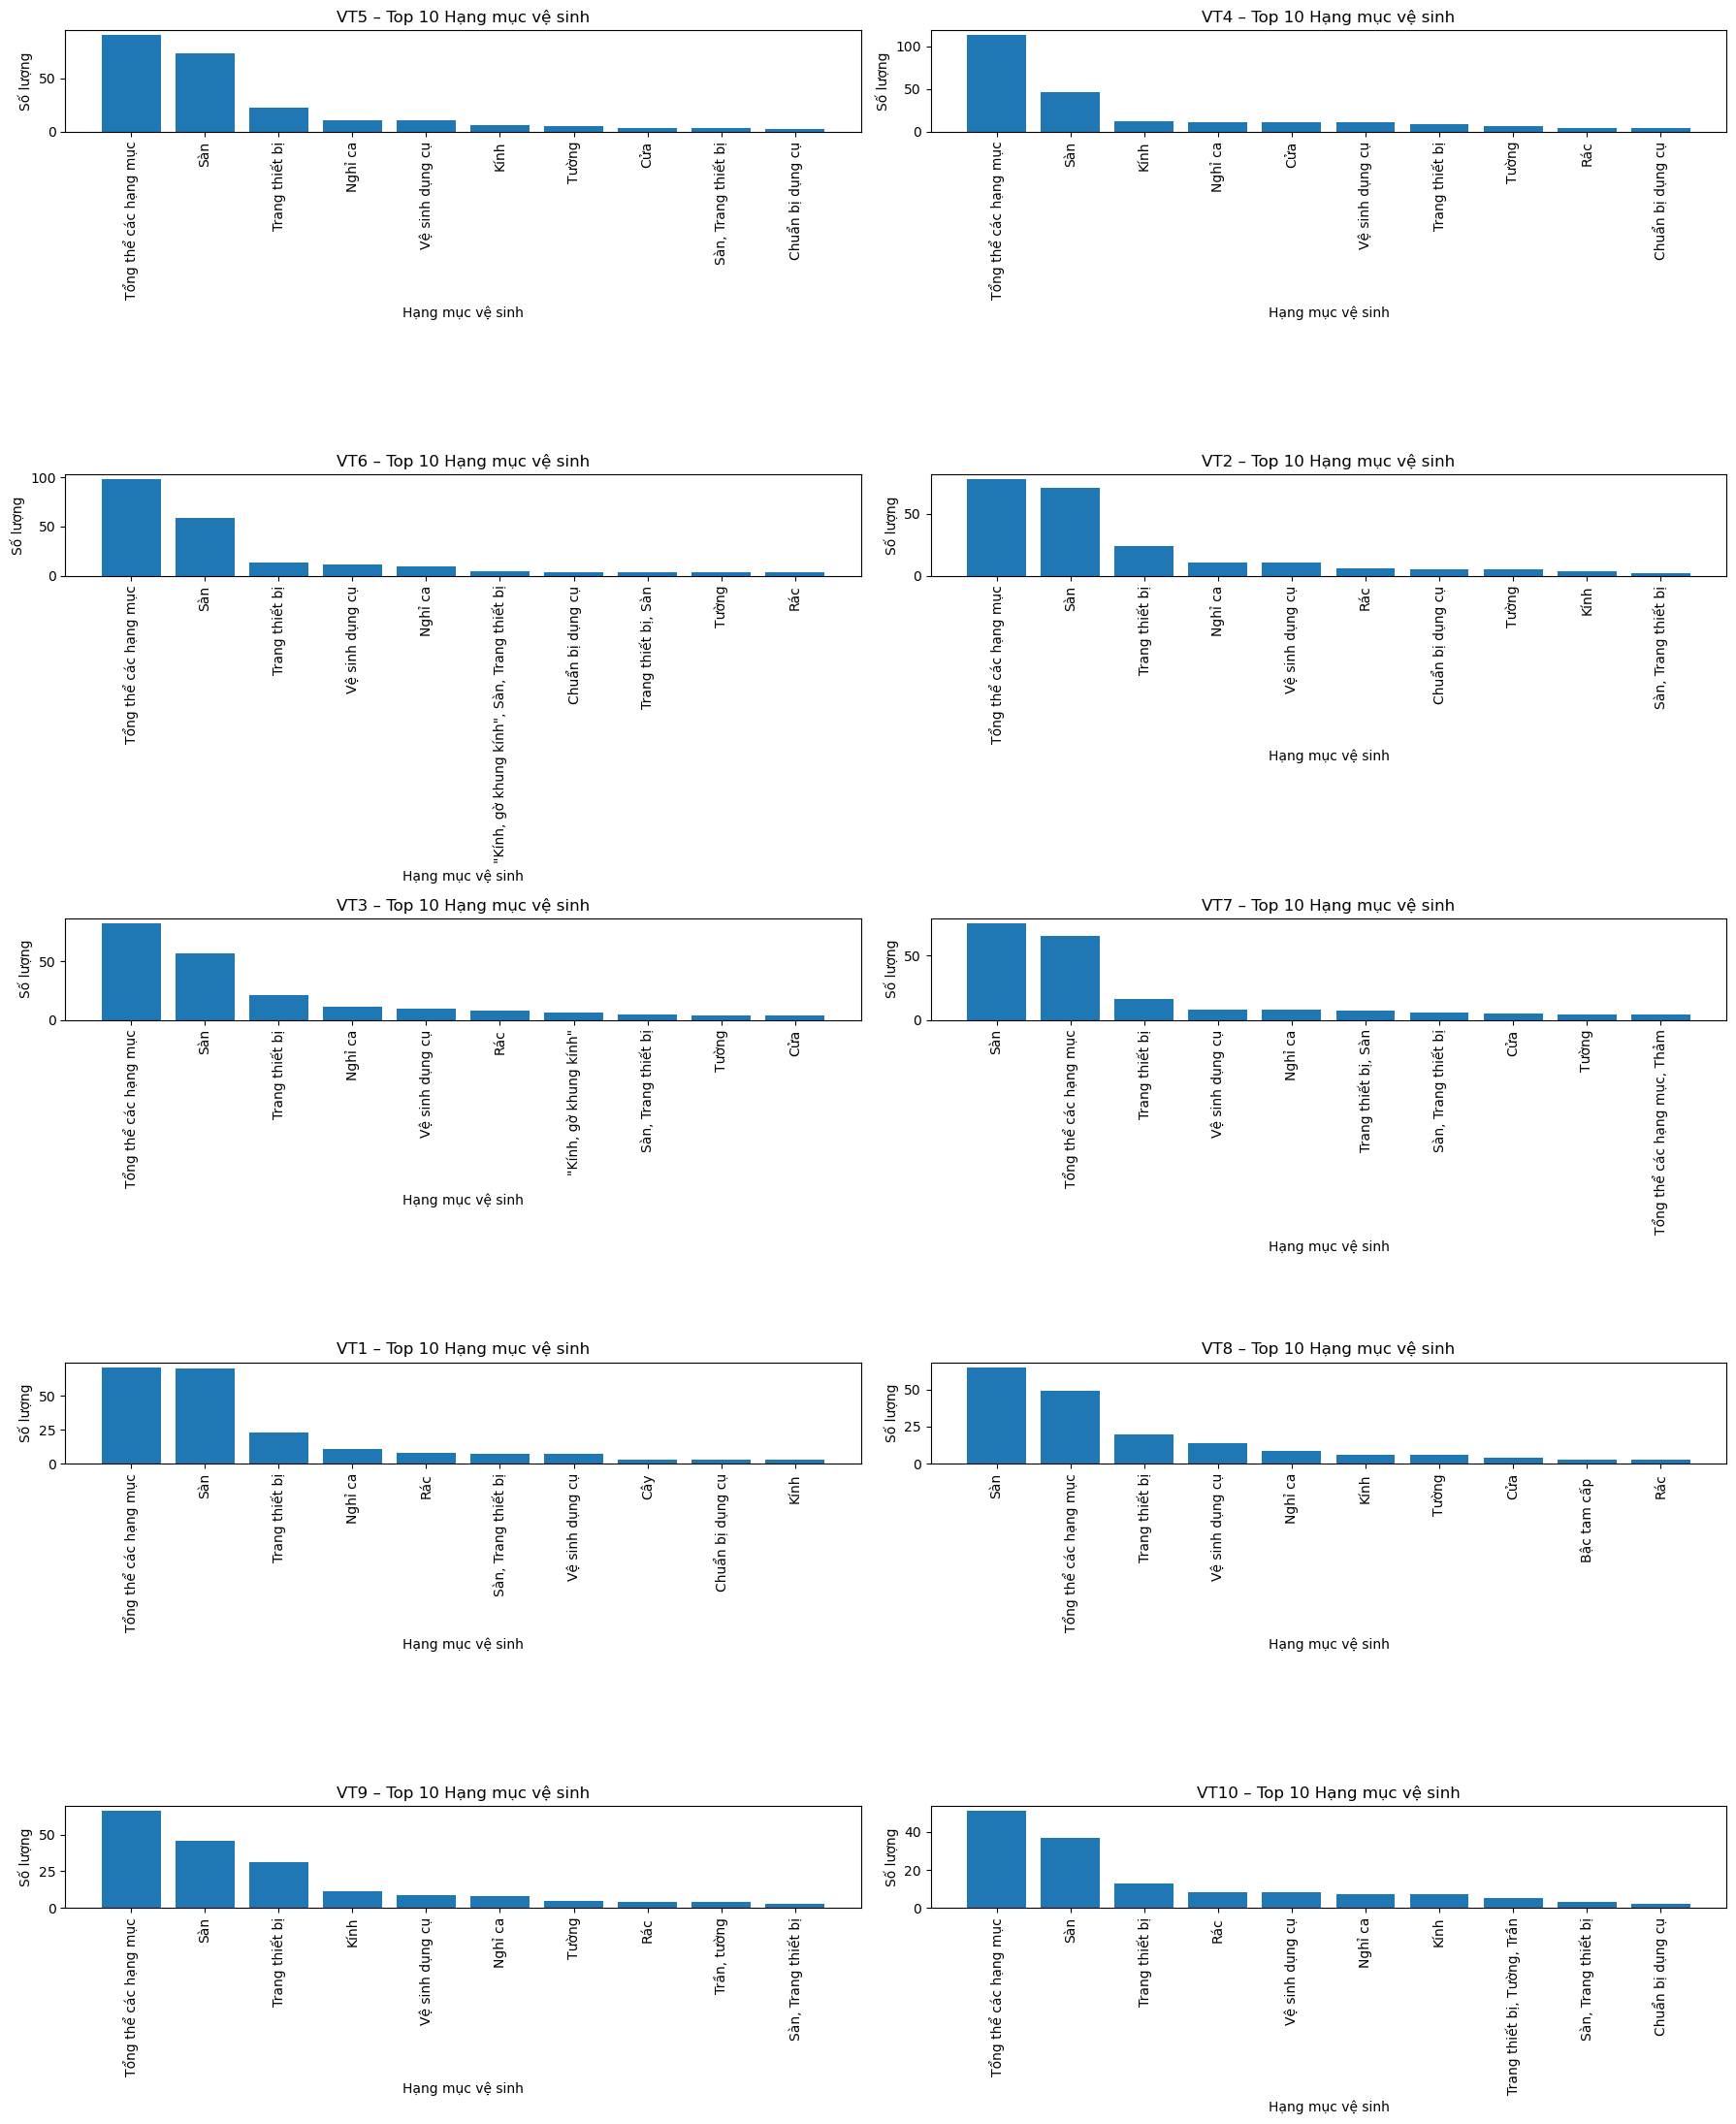

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
# df = pd.read_excel("/mnt/data/LLV_tong_hop_chuan_hoa.xlsx")

# 1️⃣ Lấy TOP 10 vị trí thực hiện nhiều nhất
top10_positions = df["Vị trí thực hiện"].value_counts().head(10).index

# 2️⃣ Lọc dữ liệu theo TOP 10 vị trí
df_top = df[df["Vị trí thực hiện"].isin(top10_positions)]

# 3️⃣ Tạo 10 biểu đồ con (mỗi VT một biểu đồ)
fig, axes = plt.subplots(5, 2, figsize=(18, 22))
axes = axes.flatten()

for i, vt in enumerate(top10_positions):
    df_vt = df_top[df_top["Vị trí thực hiện"] == vt]
    
    # TOP 10 Hạng mục vệ sinh của vị trí đó
    top10_items = df_vt["Hạng mục vệ sinh"].value_counts().head(10)
    
    ax = axes[i]
    ax.bar(top10_items.index, top10_items.values)
    ax.set_title(f"{vt} – Top 10 Hạng mục vệ sinh")
    ax.set_xlabel("Hạng mục vệ sinh")
    ax.set_ylabel("Số lượng")
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


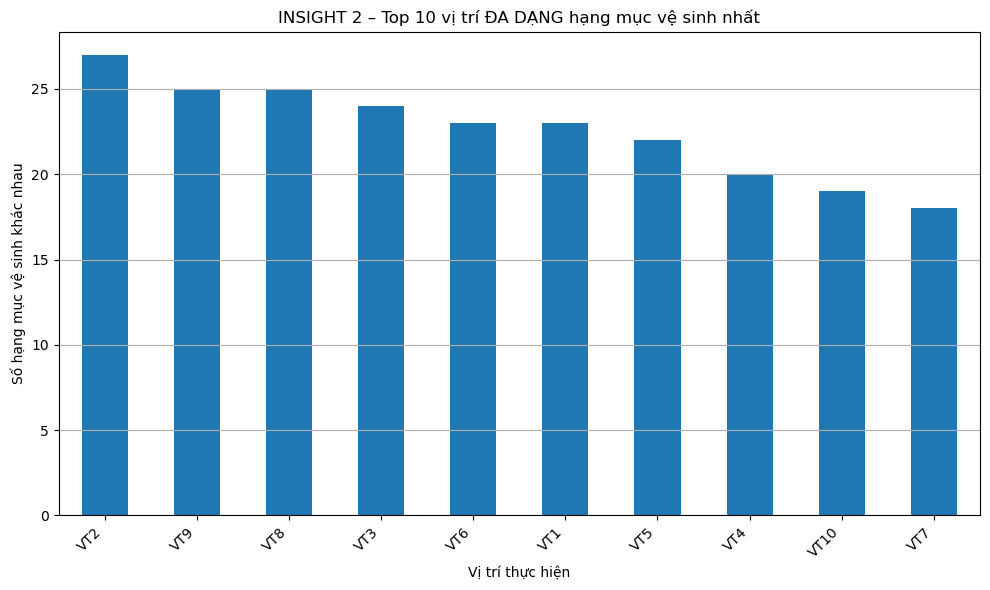

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# Loại bỏ dòng thiếu vị trí hoặc hạng mục
df = df.dropna(subset=['Vị trí thực hiện', 'Hạng mục vệ sinh'])

# Đếm số hạng mục vệ sinh KHÁC NHAU theo từng vị trí
hm_diversity = (
    df.groupby('Vị trí thực hiện')['Hạng mục vệ sinh']
      .nunique()
      .sort_values(ascending=False)
      .head(10)
)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
hm_diversity.plot(kind='bar')
plt.title("INSIGHT 2 – Top 10 vị trí ĐA DẠNG hạng mục vệ sinh nhất")
plt.xlabel("Vị trí thực hiện")
plt.ylabel("Số hạng mục vệ sinh khác nhau")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

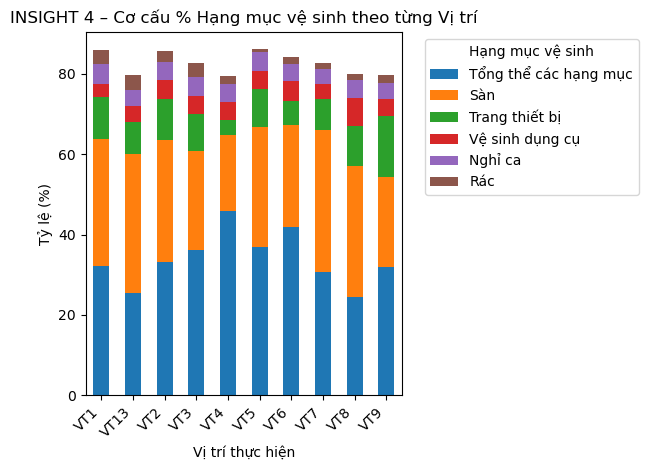

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_excel("LLV_tong_hop_chuan_hoa.xlsx", dtype=str)

# Loại bỏ dòng thiếu dữ liệu quan trọng
df = df.dropna(subset=['Vị trí thực hiện', 'Hạng mục vệ sinh'])

# Lấy top 10 vị trí có nhiều công việc nhất
top_positions = (
    df.groupby('Vị trí thực hiện')
      .size()
      .sort_values(ascending=False)
      .head(10)
      .index
)

# Lọc dữ liệu theo top vị trí
df_top = df[df['Vị trí thực hiện'].isin(top_positions)]

# Tạo bảng pivot: số công việc theo vị trí × hạng mục
hm_pivot = (
    df_top
    .groupby(['Vị trí thực hiện', 'Hạng mục vệ sinh'])
    .size()
    .unstack(fill_value=0)
)

# Chuyển sang TỶ LỆ (%)
hm_ratio = hm_pivot.div(hm_pivot.sum(axis=1), axis=0) * 100

# (tuỳ chọn) chỉ lấy top 6 hạng mục phổ biến để biểu đồ dễ đọc
top_hangmuc = df['Hạng mục vệ sinh'].value_counts().head(6).index
hm_ratio_top = hm_ratio[top_hangmuc.intersection(hm_ratio.columns)]

# Vẽ biểu đồ stacked bar theo %
plt.figure(figsize=(14, 7))
hm_ratio_top.plot(kind='bar', stacked=True)
plt.title("INSIGHT 4 – Cơ cấu % Hạng mục vệ sinh theo từng Vị trí")
plt.xlabel("Vị trí thực hiện")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Hạng mục vệ sinh", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# Chuyển Tổng thời gian thực hiện từ HH:MM:SS sang timedelta
df['Tổng thời gian thực hiện'] = pd.to_timedelta(
    df['Tổng thời gian thực hiện'],
    errors='coerce'
)

# Tạo cột số phút
df['Thời gian (phút)'] = df['Tổng thời gian thực hiện'].dt.total_seconds() / 60

# Loại bỏ dòng thiếu thông tin quan trọng
df = df.dropna(subset=[
    'Vị trí thực hiện',
    'Hạng mục vệ sinh',
    'Thời gian (phút)'
])


In [ ]:
# Lấy top 10 vị trí có nhiều công việc nhất
top_positions = (
    df.groupby('Vị trí thực hiện')
      .size()
      .sort_values(ascending=False)
      .head(10)
      .index
)

df_top = df[df['Vị trí thực hiện'].isin(top_positions)]

# Thời gian trung bình theo vị trí × hạng mục
hm_time_avg = (
    df_top
    .groupby(['Vị trí thực hiện', 'Hạng mục vệ sinh'])['Thời gian (phút)']
    .mean()
    .reset_index()
)
# Với mỗi vị trí, lấy hạng mục có thời gian trung bình cao nhất


In [26]:
hm_time_max = (
    hm_time_avg
    .sort_values(['Vị trí thực hiện', 'Thời gian (phút)'], ascending=[True, False])
    .groupby('Vị trí thực hiện')
    .head(1)
)


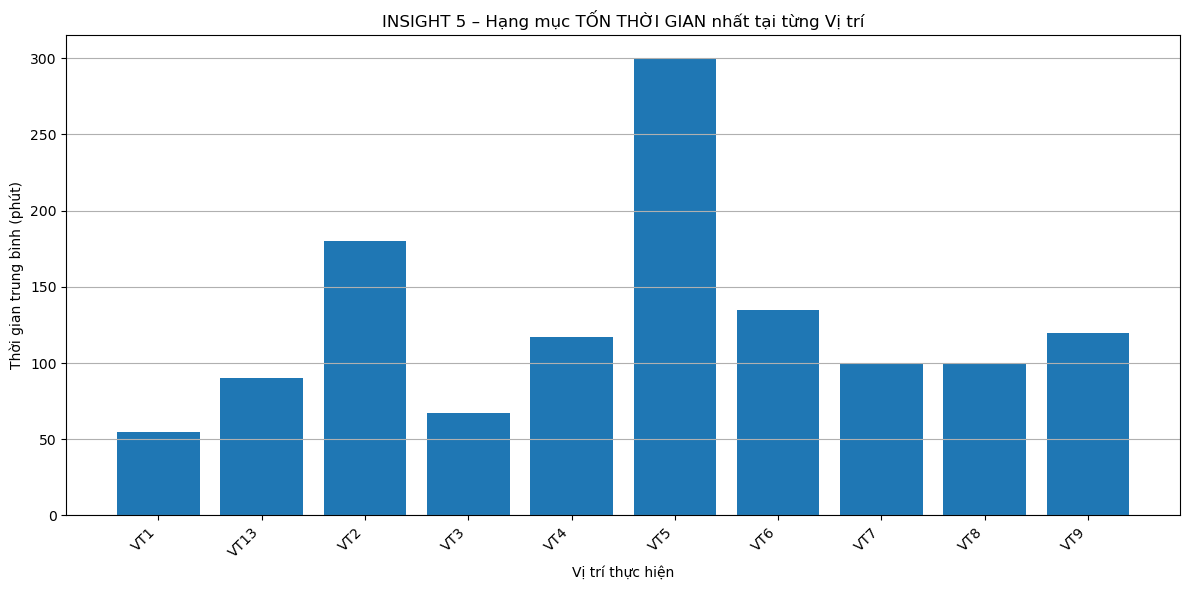

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(
    hm_time_max['Vị trí thực hiện'],
    hm_time_max['Thời gian (phút)']
)

plt.title("INSIGHT 5 – Hạng mục TỐN THỜI GIAN nhất tại từng Vị trí")
plt.xlabel("Vị trí thực hiện")
plt.ylabel("Thời gian trung bình (phút)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


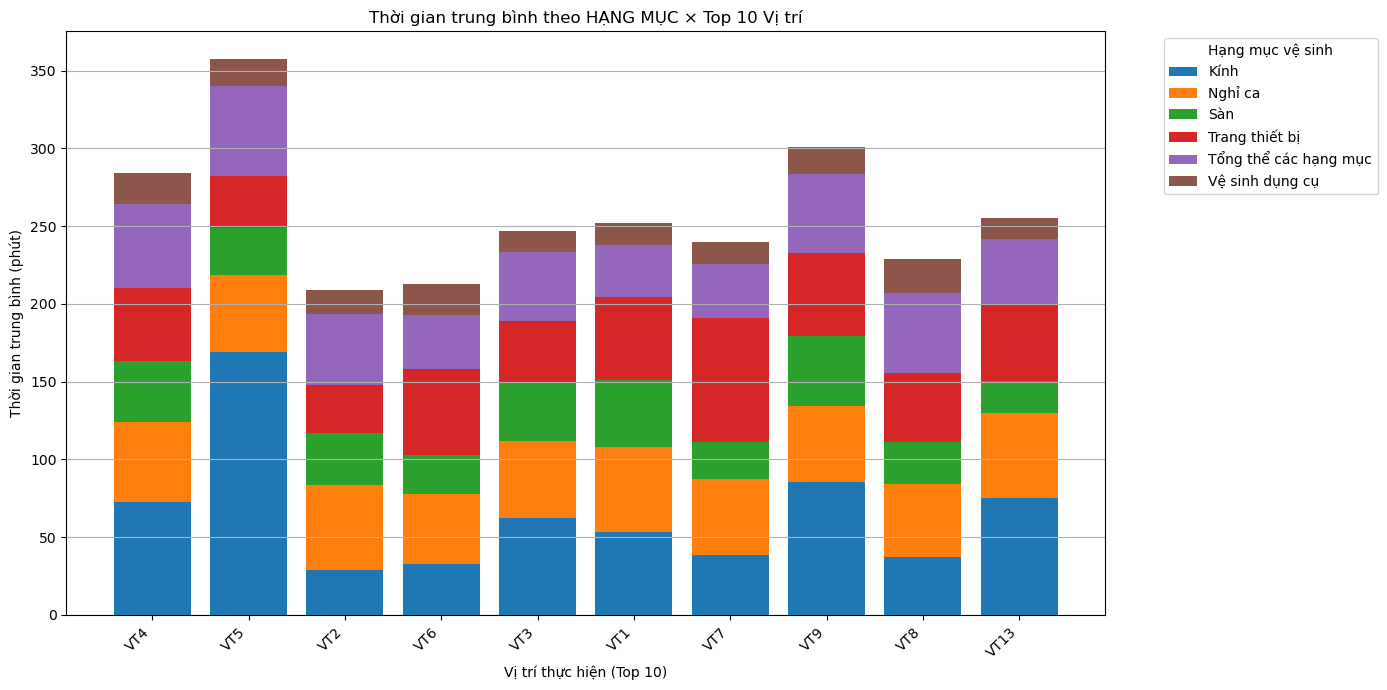

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =============================
# 1. ĐỌC DỮ LIỆU & CHUẨN HOÁ THỜI GIAN
# =============================
df = pd.read_excel("LLV_tong_hop_chuan_hoa.xlsx", dtype=str)

df['Tổng thời gian thực hiện'] = pd.to_timedelta(
    df['Tổng thời gian thực hiện'], errors='coerce'
)
df['Thời gian (phút)'] = df['Tổng thời gian thực hiện'].dt.total_seconds() / 60

df = df.dropna(subset=[
    'Vị trí thực hiện',
    'Hạng mục vệ sinh',
    'Thời gian (phút)'
])

# =============================
# 2. TOP 10 VỊ TRÍ (THEO SỐ LẦN)
# =============================
top_positions = (
    df['Vị trí thực hiện']
    .value_counts()
    .head(10)
    .index
)

df_top = df[df['Vị trí thực hiện'].isin(top_positions)]

# =============================
# 3. TOP 6 HẠNG MỤC (THEO TẦN SUẤT XUẤT HIỆN)
# =============================
top_hangmuc = (
    df_top['Hạng mục vệ sinh']
    .value_counts()
    .head(6)
    .index
)

# =============================
# 4. THỜI GIAN TRUNG BÌNH: VỊ TRÍ × HẠNG MỤC
# =============================
pivot_time = (
    df_top[df_top['Hạng mục vệ sinh'].isin(top_hangmuc)]
    .groupby(['Vị trí thực hiện', 'Hạng mục vệ sinh'])['Thời gian (phút)']
    .mean()
    .unstack(fill_value=0)
)

# Giữ đúng thứ tự top 10 vị trí
pivot_time = pivot_time.reindex(top_positions)

# =============================
# 5. VẼ STACKED BAR
# =============================
x = np.arange(len(pivot_time.index))
bottom = np.zeros(len(x))

plt.figure(figsize=(14, 7))

for hm in pivot_time.columns:
    plt.bar(x, pivot_time[hm], bottom=bottom, label=hm)
    bottom += pivot_time[hm].values

plt.xticks(x, pivot_time.index, rotation=45, ha='right')
plt.xlabel("Vị trí thực hiện (Top 10)")
plt.ylabel("Thời gian trung bình (phút)")
plt.title("Thời gian trung bình theo HẠNG MỤC × Top 10 Vị trí")
plt.legend(title="Hạng mục vệ sinh", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Index(['Nhân viên KD', 'Mã KD', 'Mã địa điểm', 'Vị trí Tòa/ Tháp/ Khu',
       'Vị trí Tầng/ Hầm', 'Khu vực vệ sinh', 'Hạng mục vệ sinh',
       'Kỹ thuật thực hiện', 'Mô tả chi tiết công việc', 'Tần suất thực hiện',
       'Ca làm việc', 'Vị trí thực hiện', 'Tính chất', 'Bộ lịch', 'Thứ',
       'Tuần', 'Số lần/Tuần', 'Số lần/Tháng', 'Số lần/Quý', 'Số lần/\nNăm',
       'Bắt đầu', 'Kết thúc', 'Tổng thời gian thực hiện', 'Tên Dự Án',
       'Thời gian (phút)'],
      dtype='object')

In [11]:
df["Kỹ thuật thực hiện"].value_counts()

Kỹ thuật thực hiện
Trực tua                            793
TVS                                 577
Đẩy ẩm                              428
Lau                                 415
"Lau, dọn"                          233
Quét                                213
Chà gạt                             128
Lau, dọn                            116
"Ăn, ngủ, nghỉ"                     108
Đẩy khô                             103
Thu gom                              91
Đánh sàn                             76
Ăn, ngủ, nghỉ                        46
Giặt                                 41
Tẩy điểm                             41
"Sắp xếp, chuẩn bị"                  36
Giao ca                              36
Sắp xếp, chuẩn bị                    27
Đẩy khô, Đẩy ẩm                      23
Đánh bóng                            18
Đẩy ẩm, Đẩy khô                      15
Thay                                 13
Cấp phát                             11
Vận chuyển                           11
Hút bụi              

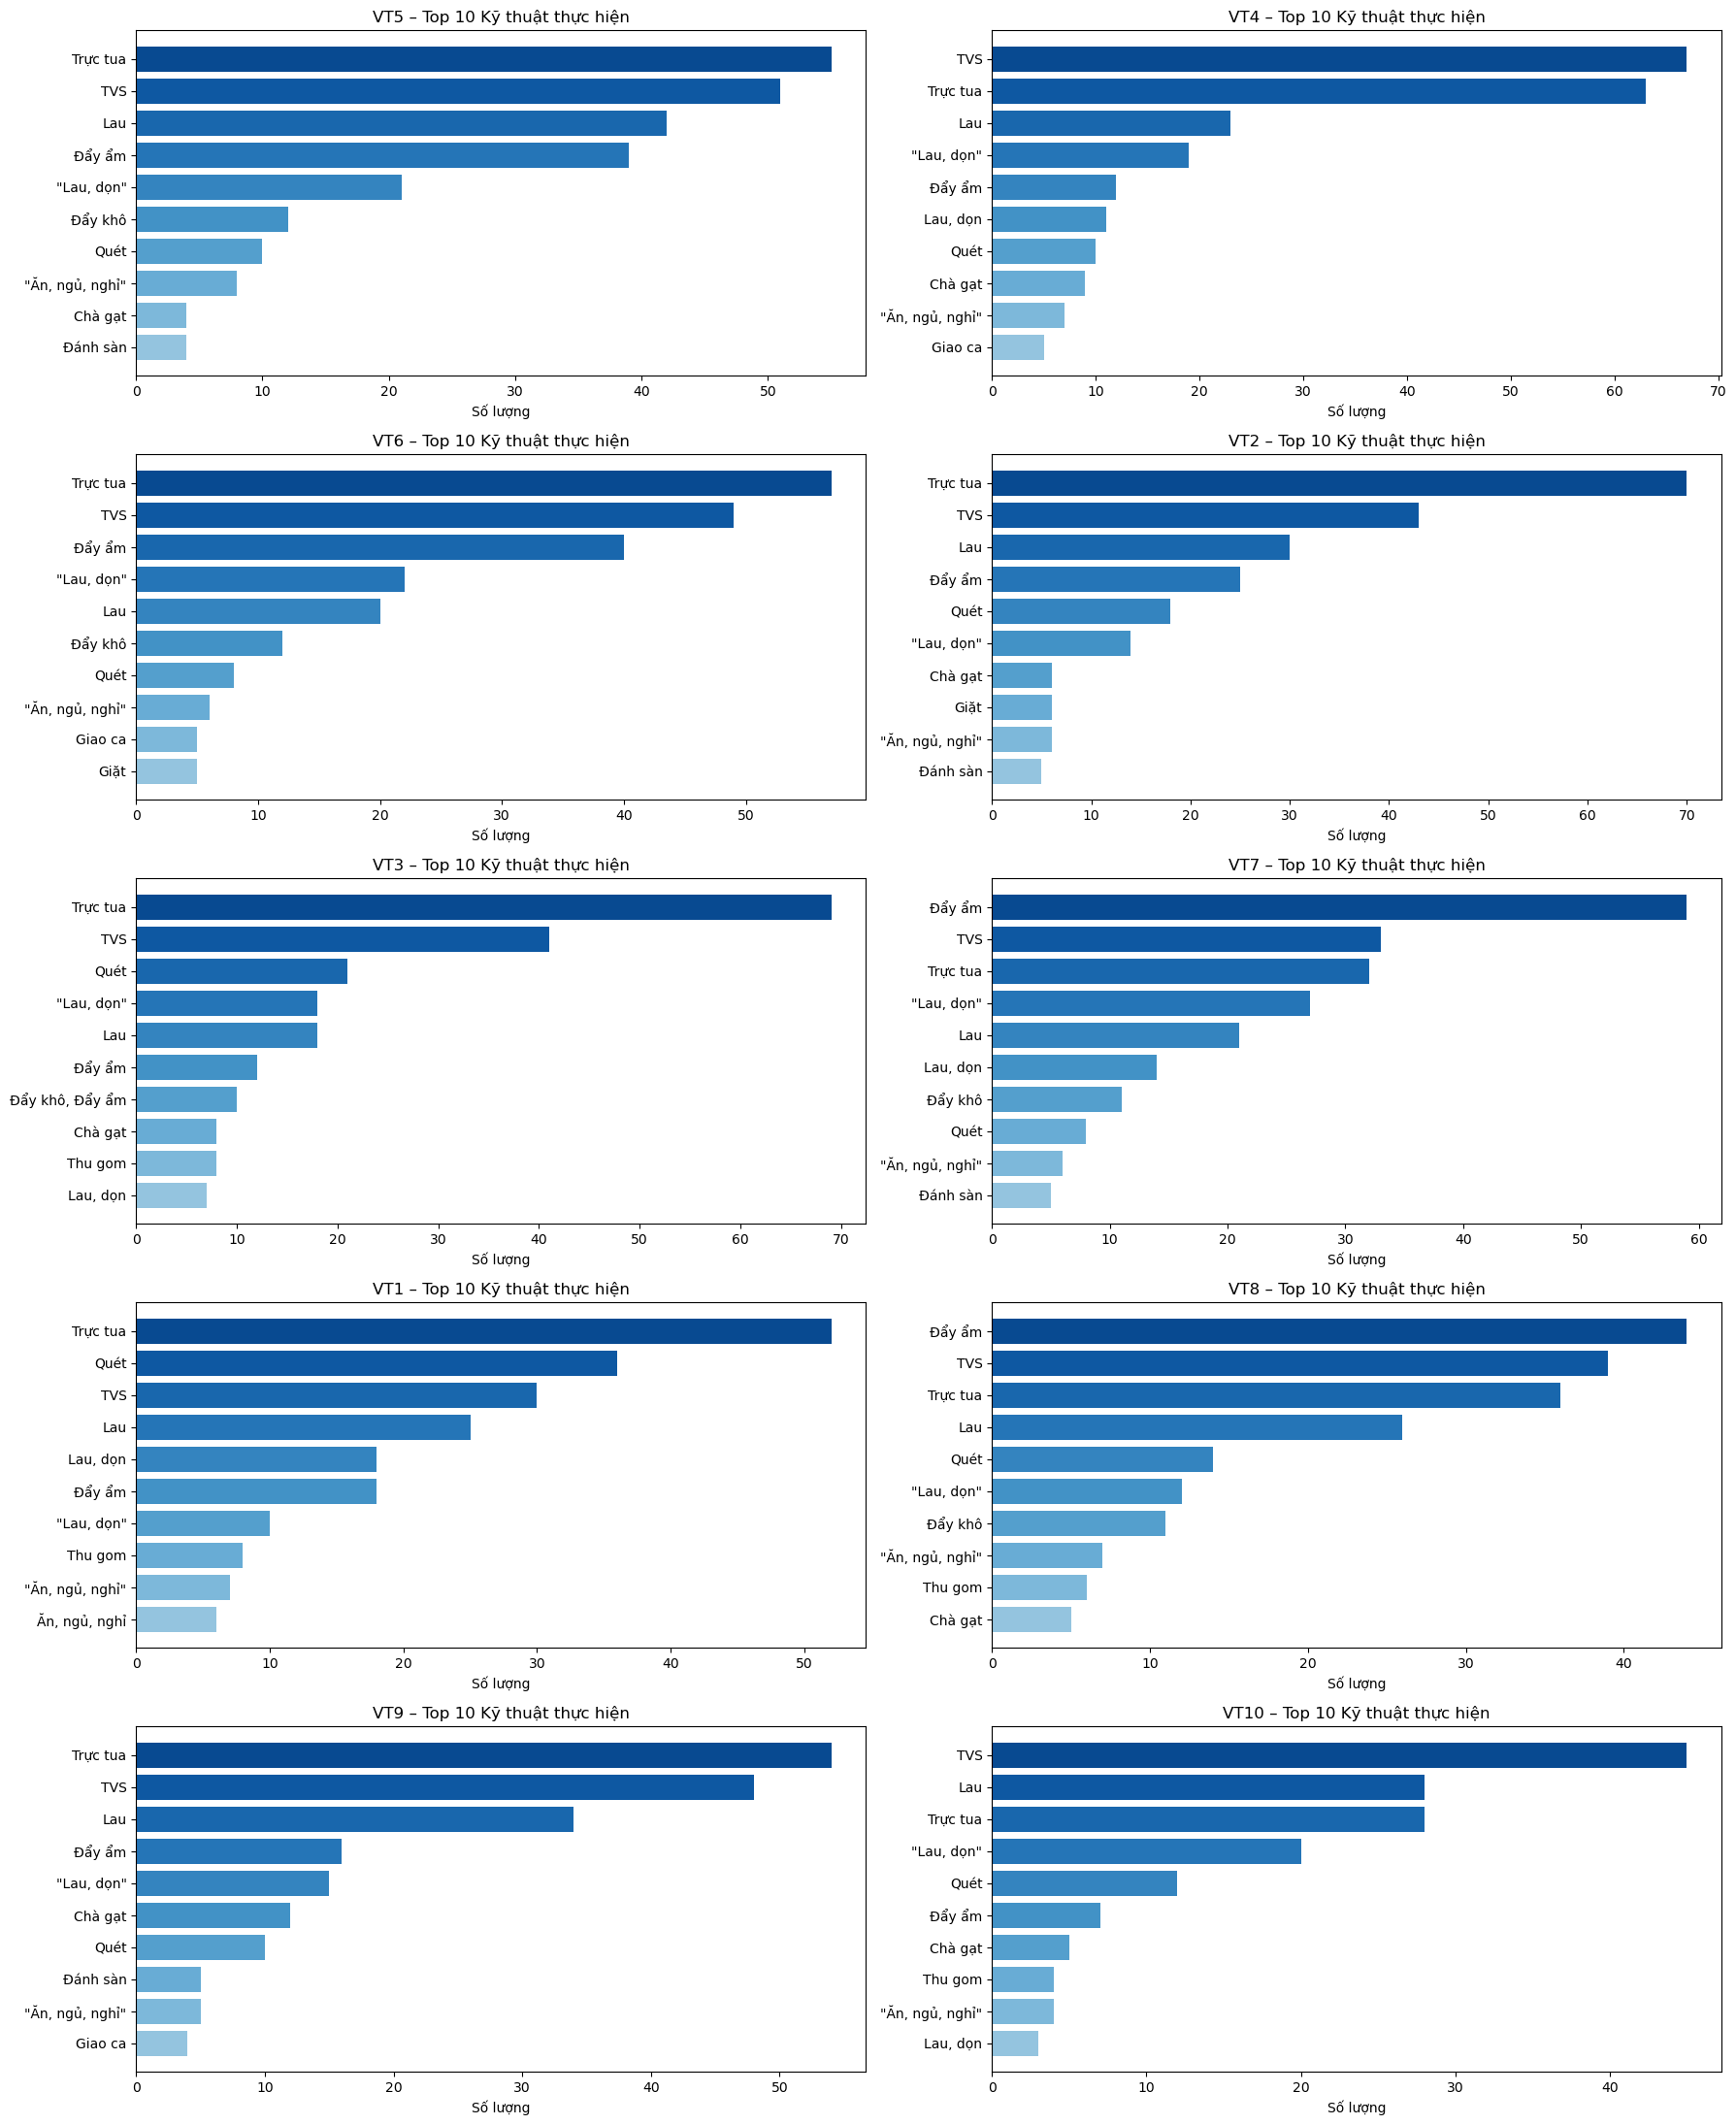

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


top10_positions = df["Vị trí thực hiện"].value_counts().head(10).index
df_top = df[df["Vị trí thực hiện"].isin(top10_positions)]

fig, axes = plt.subplots(5, 2, figsize=(18, 22))
axes = axes.flatten()

for i, vt in enumerate(top10_positions):
    df_vt = df_top[df_top["Vị trí thực hiện"] == vt]
    top10_tech = (
        df_vt["Kỹ thuật thực hiện"]
        .value_counts()
        .head(10)
        .sort_values()
    )
    
    values = top10_tech.values
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(values)))
    
    ax = axes[i]
    ax.barh(top10_tech.index, values, color=colors)
    ax.set_title(f"{vt} – Top 10 Kỹ thuật thực hiện")
    ax.set_xlabel("Số lượng")

plt.tight_layout()
plt.show()


C:\Users\tainl\AppData\Local\Temp\ipykernel_33996\4152383452.py:26: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x700 with 0 Axes>

c:\Users\tainl\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


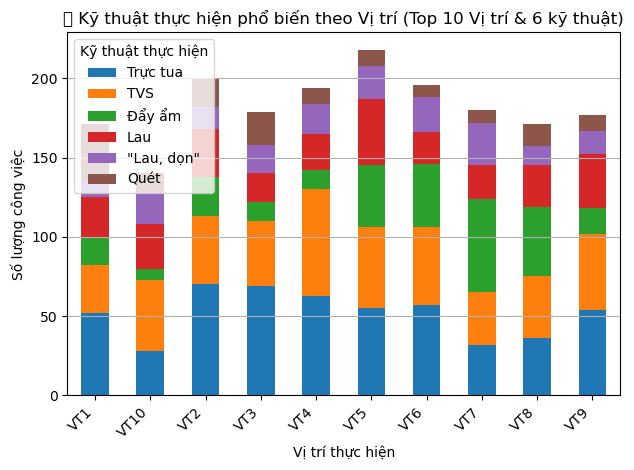

In [19]:
import matplotlib.pyplot as plt

# Lọc top 10 vị trí thực hiện
top_positions = df['Vị trí thực hiện'].value_counts().head(10).index

# Lọc kỹ thuật phổ biến nhất
top_techniques = df['Kỹ thuật thực hiện'].value_counts().head(6).index

# Lọc dữ liệu liên quan
kt_data = df[df['Vị trí thực hiện'].isin(top_positions)]

# Tạo bảng chéo (pivot) nhóm dữ liệu
kt_pivot = kt_data.groupby(['Vị trí thực hiện', 'Kỹ thuật thực hiện']).size().unstack(fill_value=0)

# Chỉ giữ lại các kỹ thuật phổ biến nhất
kt_pivot_top = kt_pivot[top_techniques.intersection(kt_pivot.columns)]

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
kt_pivot_top.plot(kind='bar', stacked=True)
plt.title('🛠️ Kỹ thuật thực hiện phổ biến theo Vị trí (Top 10 Vị trí & 6 kỹ thuật)')
plt.xlabel('Vị trí thực hiện')
plt.ylabel('Số lượng công việc')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Kỹ thuật thực hiện')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


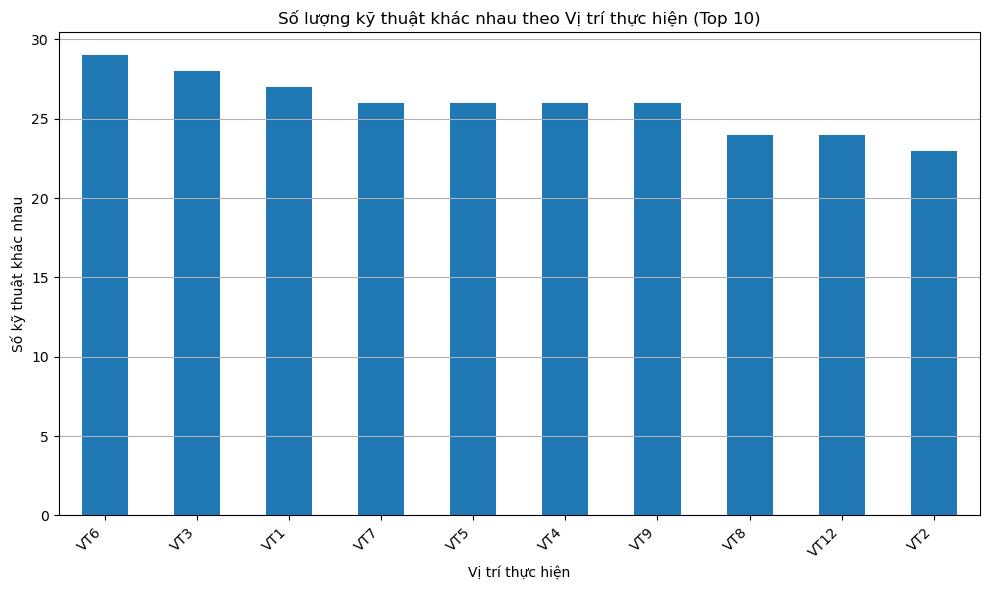

In [20]:
# Tạo bảng pivot: hàng = Vị trí, cột = Kỹ thuật, giá trị = số lần
kt_pivot = df.pivot_table(
    index='Vị trí thực hiện',
    columns='Kỹ thuật thực hiện',
    aggfunc='size',
    fill_value=0
)

# Đếm số kỹ thuật KHÁC NHAU tại mỗi vị trí (giá trị > 0)
kt_diversity = (kt_pivot > 0).sum(axis=1)

# Sắp xếp giảm dần
kt_diversity = kt_diversity.sort_values(ascending=False)

top_kt_diversity = kt_diversity.head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
top_kt_diversity.plot(kind='bar')

plt.title('Số lượng kỹ thuật khác nhau theo Vị trí thực hiện (Top 10)')
plt.xlabel('Vị trí thực hiện')
plt.ylabel('Số kỹ thuật khác nhau')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


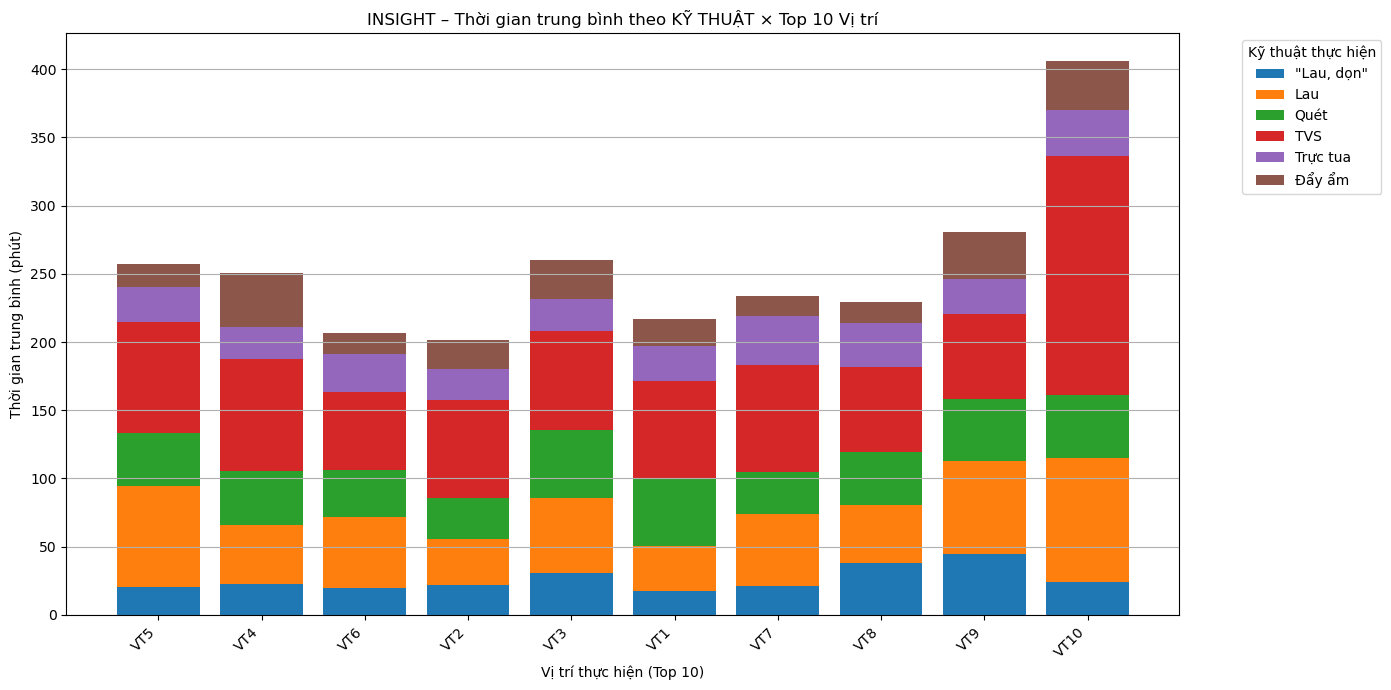

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =============================
# 1. ĐỌC DỮ LIỆU & CHUẨN HOÁ THỜI GIAN
# =============================
df = pd.read_excel("LLV_tong_hop_chuan_hoa.xlsx", dtype=str)

df['Tổng thời gian thực hiện'] = pd.to_timedelta(
    df['Tổng thời gian thực hiện'], errors='coerce'
)
df['Thời gian (phút)'] = df['Tổng thời gian thực hiện'].dt.total_seconds() / 60

df = df.dropna(subset=[
    'Vị trí thực hiện',
    'Kỹ thuật thực hiện',
    'Thời gian (phút)'
])

# =============================
# 2. TOP 10 VỊ TRÍ (THEO SỐ LẦN)
# =============================
top_positions = (
    df['Vị trí thực hiện']
    .value_counts()
    .head(10)
    .index
)

df_top = df[df['Vị trí thực hiện'].isin(top_positions)]

# =============================
# 3. TOP 6 KỸ THUẬT (THEO TẦN SUẤT XUẤT HIỆN)
# =============================
top_techniques = (
    df_top['Kỹ thuật thực hiện']
    .value_counts()
    .head(6)
    .index
)

# =============================
# 4. THỜI GIAN TRUNG BÌNH: VỊ TRÍ × KỸ THUẬT
# =============================
pivot_time = (
    df_top[df_top['Kỹ thuật thực hiện'].isin(top_techniques)]
    .groupby(['Vị trí thực hiện', 'Kỹ thuật thực hiện'])['Thời gian (phút)']
    .mean()
    .unstack(fill_value=0)
)

# Giữ đúng thứ tự Top 10 vị trí
pivot_time = pivot_time.reindex(top_positions)

# =============================
# 5. VẼ STACKED BAR
# =============================
x = np.arange(len(pivot_time.index))
bottom = np.zeros(len(x))

plt.figure(figsize=(14, 7))

for tech in pivot_time.columns:
    plt.bar(x, pivot_time[tech], bottom=bottom, label=tech)
    bottom += pivot_time[tech].values

plt.xticks(x, pivot_time.index, rotation=45, ha='right')
plt.xlabel("Vị trí thực hiện (Top 10)")
plt.ylabel("Thời gian trung bình (phút)")
plt.title("INSIGHT – Thời gian trung bình theo KỸ THUẬT × Top 10 Vị trí")
plt.legend(
    title="Kỹ thuật thực hiện",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [15]:
df["Tính chất"].value_counts()

Tính chất
Làm sạch                          1239
Định kỳ                            970
Trực tua                           825
Nghỉ ca                            169
Vệ sinh dụng cụ                    156
Xử lý rác                           74
Chuẩn bị đầu ca                     65
Tổng vệ sinh                        64
Làm sạch / Xử lý rác                20
Chuẩn bị vật tư                     18
Kết thúc ca                         15
Hỗ trợ                              15
Kiểm tra & xử lý                    13
Giao ca                              8
Bổ sung & thay vật tư tiêu hao       8
Vận chuyển                           4
Tổng hợp                             4
Chăm sóc cây                         2
Sắp xếp                              1
Thu gom                              1
Name: count, dtype: int64

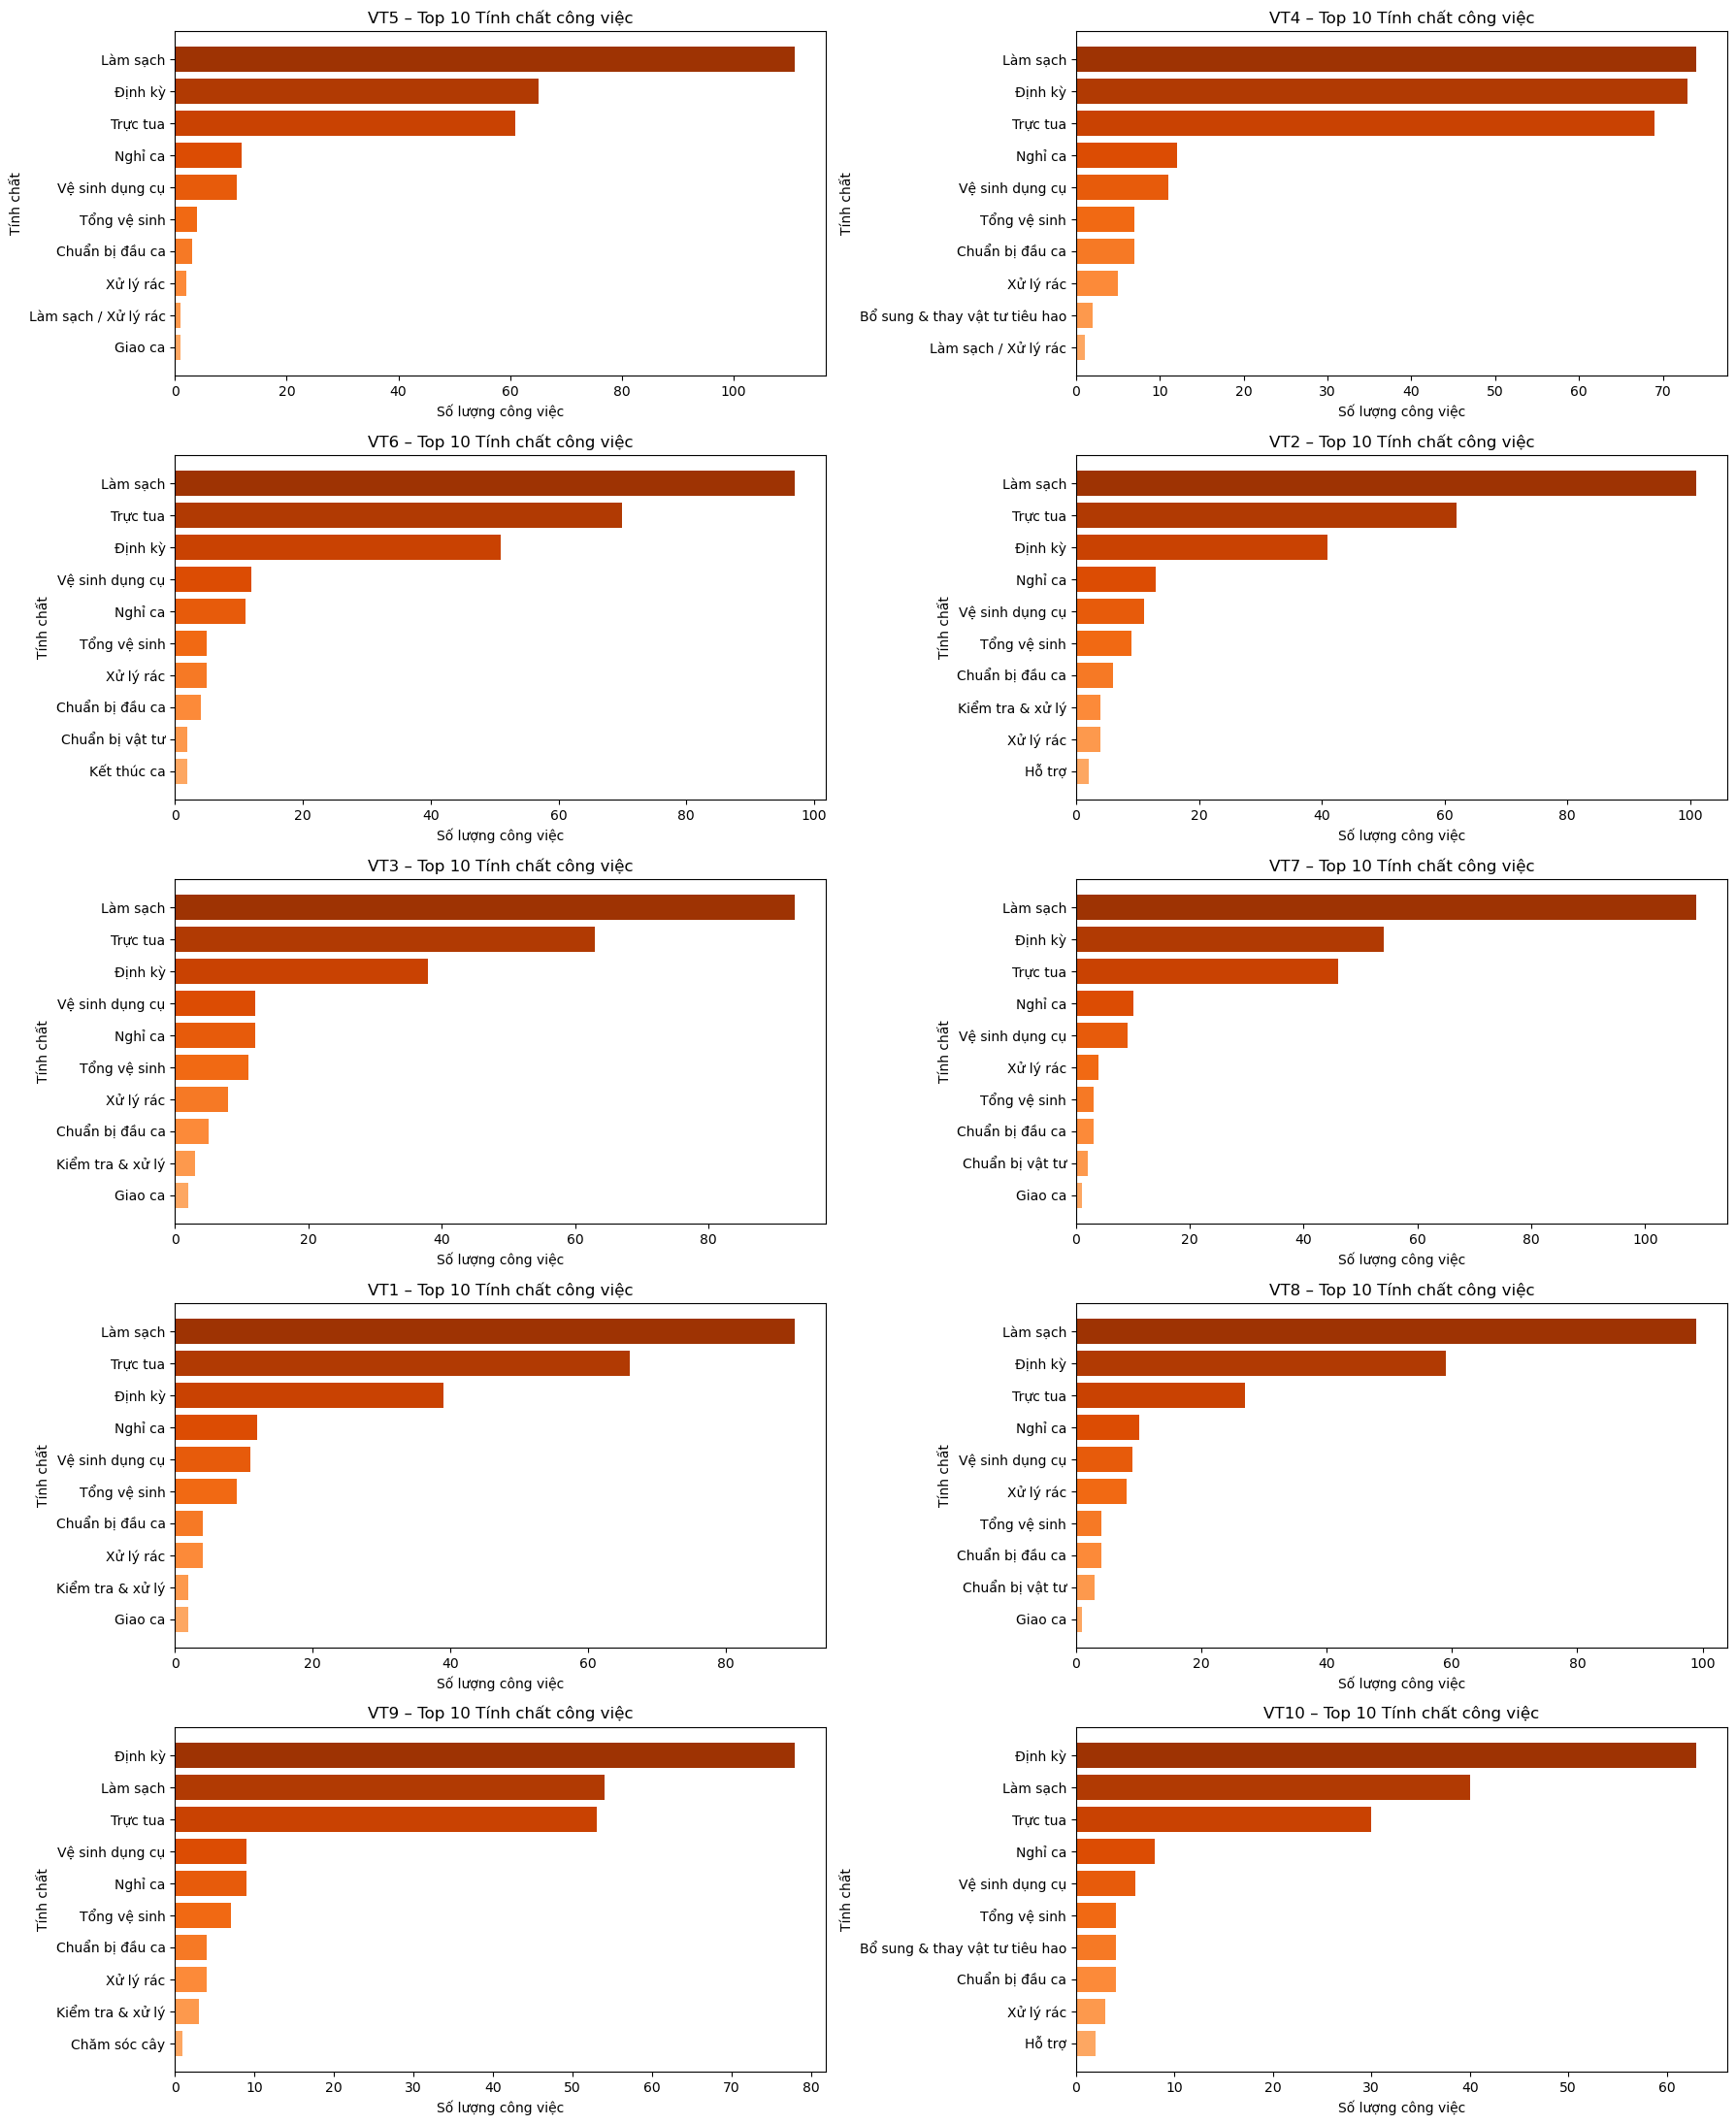

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


top10_positions = df["Vị trí thực hiện"].value_counts().head(10).index
df_top = df[df["Vị trí thực hiện"].isin(top10_positions)]

# 2️⃣ Vẽ biểu đồ
fig, axes = plt.subplots(5, 2, figsize=(18, 22))
axes = axes.flatten()

for i, vt in enumerate(top10_positions):
    df_vt = df_top[df_top["Vị trí thực hiện"] == vt]
    
    top10_nature = (
        df_vt["Tính chất"]
        .value_counts()
        .head(10)
        .sort_values()
    )
    
    values = top10_nature.values
    colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(values)))
    
    ax = axes[i]
    ax.barh(top10_nature.index, values, color=colors)
    ax.set_title(f"{vt} – Top 10 Tính chất công việc")
    ax.set_xlabel("Số lượng công việc")
    ax.set_ylabel("Tính chất")

plt.tight_layout()
plt.show()


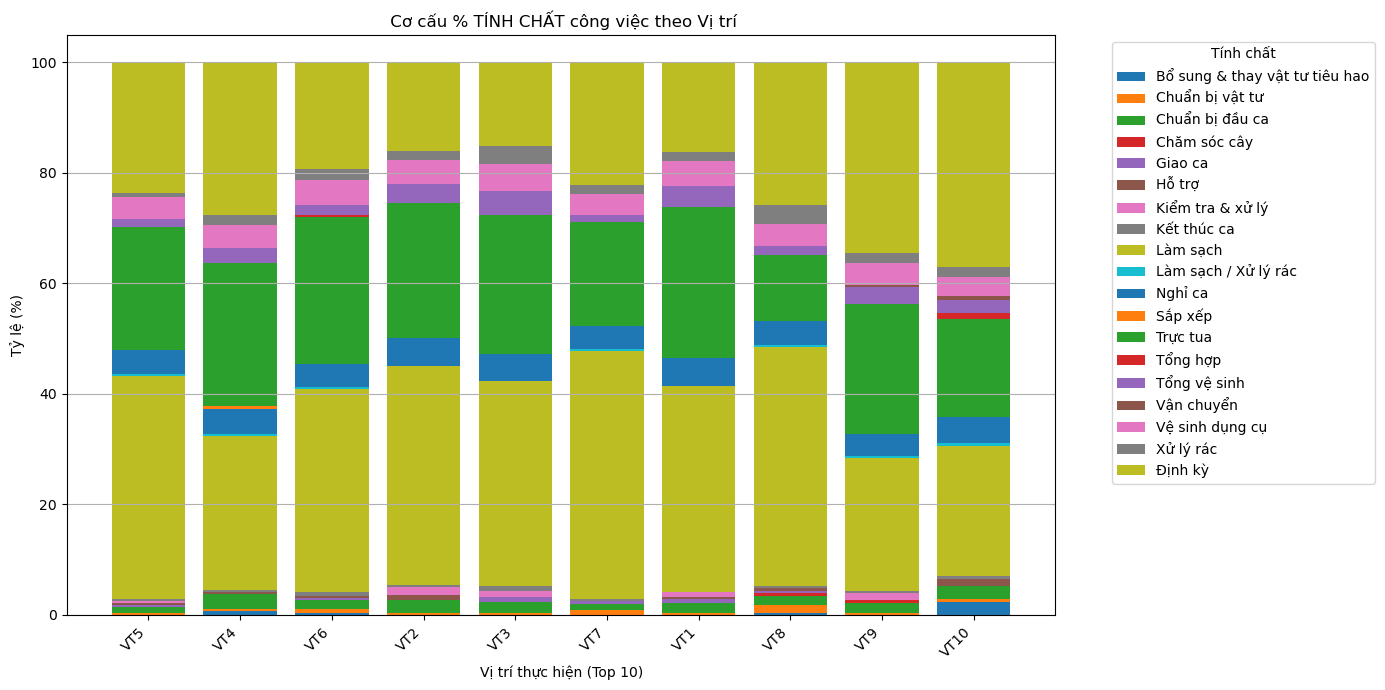

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu
df = pd.read_excel("LLV_tong_hop_chuan_hoa.xlsx", dtype=str)

df = df.dropna(subset=['Vị trí thực hiện', 'Tính chất'])

# Top 10 vị trí theo số lần
top_positions = (
    df['Vị trí thực hiện']
    .value_counts()
    .head(10)
    .index
)

df_top = df[df['Vị trí thực hiện'].isin(top_positions)]

# Pivot: số lượng theo vị trí × tính chất
pivot_tc = (
    df_top
    .groupby(['Vị trí thực hiện', 'Tính chất'])
    .size()
    .unstack(fill_value=0)
)

# Chuyển sang %
pivot_tc_pct = pivot_tc.div(pivot_tc.sum(axis=1), axis=0) * 100
pivot_tc_pct = pivot_tc_pct.reindex(top_positions)

# Vẽ stacked bar
x = np.arange(len(pivot_tc_pct.index))
bottom = np.zeros(len(x))

plt.figure(figsize=(14, 7))
for col in pivot_tc_pct.columns:
    plt.bar(x, pivot_tc_pct[col], bottom=bottom, label=col)
    bottom += pivot_tc_pct[col].values

plt.xticks(x, pivot_tc_pct.index, rotation=45, ha='right')
plt.xlabel("Vị trí thực hiện (Top 10)")
plt.ylabel("Tỷ lệ (%)")
plt.title(" Cơ cấu % TÍNH CHẤT công việc theo Vị trí")
plt.legend(title="Tính chất", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


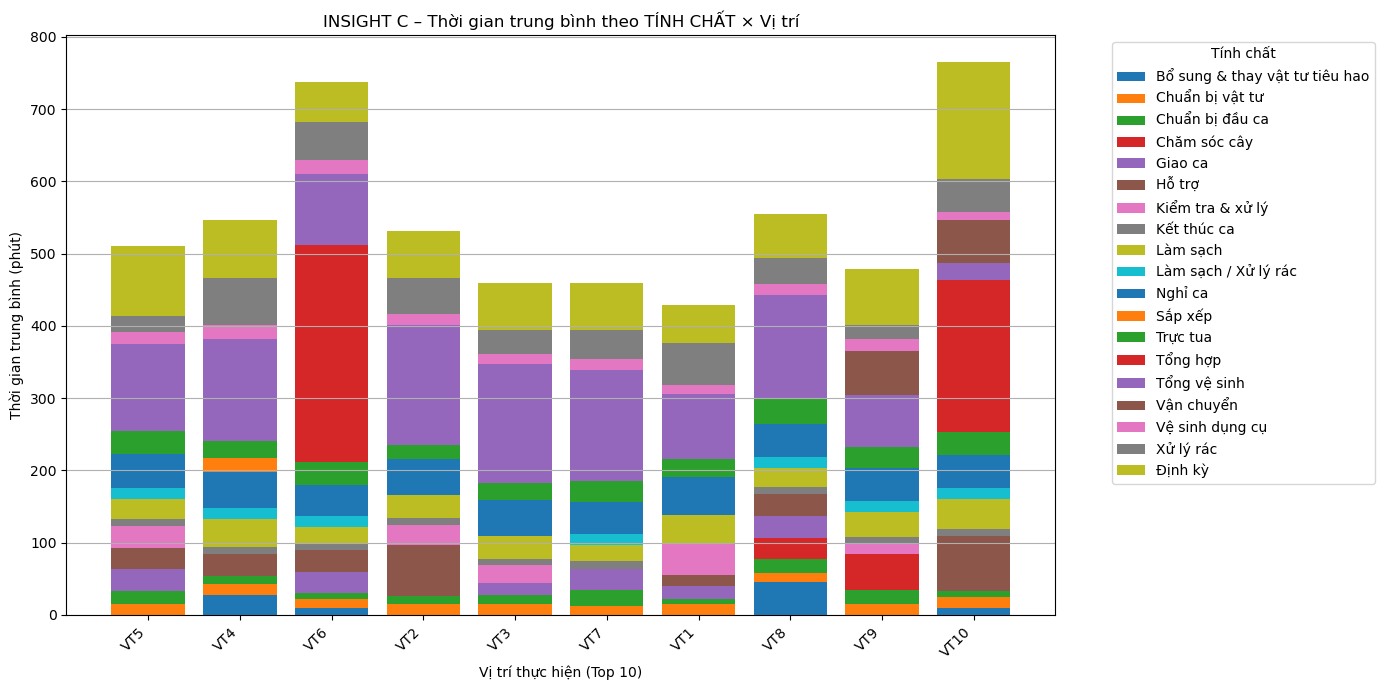

In [41]:
# Chuẩn hoá thời gian
df['Tổng thời gian thực hiện'] = pd.to_timedelta(
    df['Tổng thời gian thực hiện'], errors='coerce'
)
df['Thời gian (phút)'] = df['Tổng thời gian thực hiện'].dt.total_seconds() / 60

df_time = df.dropna(subset=[
    'Vị trí thực hiện',
    'Tính chất',
    'Thời gian (phút)'
])

top_positions = (
    df_time['Vị trí thực hiện']
    .value_counts()
    .head(10)
    .index
)

df_top = df_time[df_time['Vị trí thực hiện'].isin(top_positions)]

pivot_time_tc = (
    df_top
    .groupby(['Vị trí thực hiện', 'Tính chất'])['Thời gian (phút)']
    .mean()
    .unstack(fill_value=0)
)

pivot_time_tc = pivot_time_tc.reindex(top_positions)

# Vẽ
x = np.arange(len(pivot_time_tc.index))
bottom = np.zeros(len(x))

plt.figure(figsize=(14, 7))
for col in pivot_time_tc.columns:
    plt.bar(x, pivot_time_tc[col], bottom=bottom, label=col)
    bottom += pivot_time_tc[col].values

plt.xticks(x, pivot_time_tc.index, rotation=45, ha='right')
plt.xlabel("Vị trí thực hiện (Top 10)")
plt.ylabel("Thời gian trung bình (phút)")
plt.title("INSIGHT C – Thời gian trung bình theo TÍNH CHẤT × Vị trí")
plt.legend(title="Tính chất", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [17]:
df["Vị trí Tầng/ Hầm"].value_counts()

Vị trí Tầng/ Hầm
Tầng 1                574
Ngoại cảnh            137
Hầm                    85
Tầng G                 66
Tầng 13                51
                     ... 
Tầng 9 đến tầng 12      1
Tầng 14 - 2             1
Tâng 14                 1
Tâng 2                  1
Tầng 8, 12,12A,14       1
Name: count, Length: 343, dtype: int64

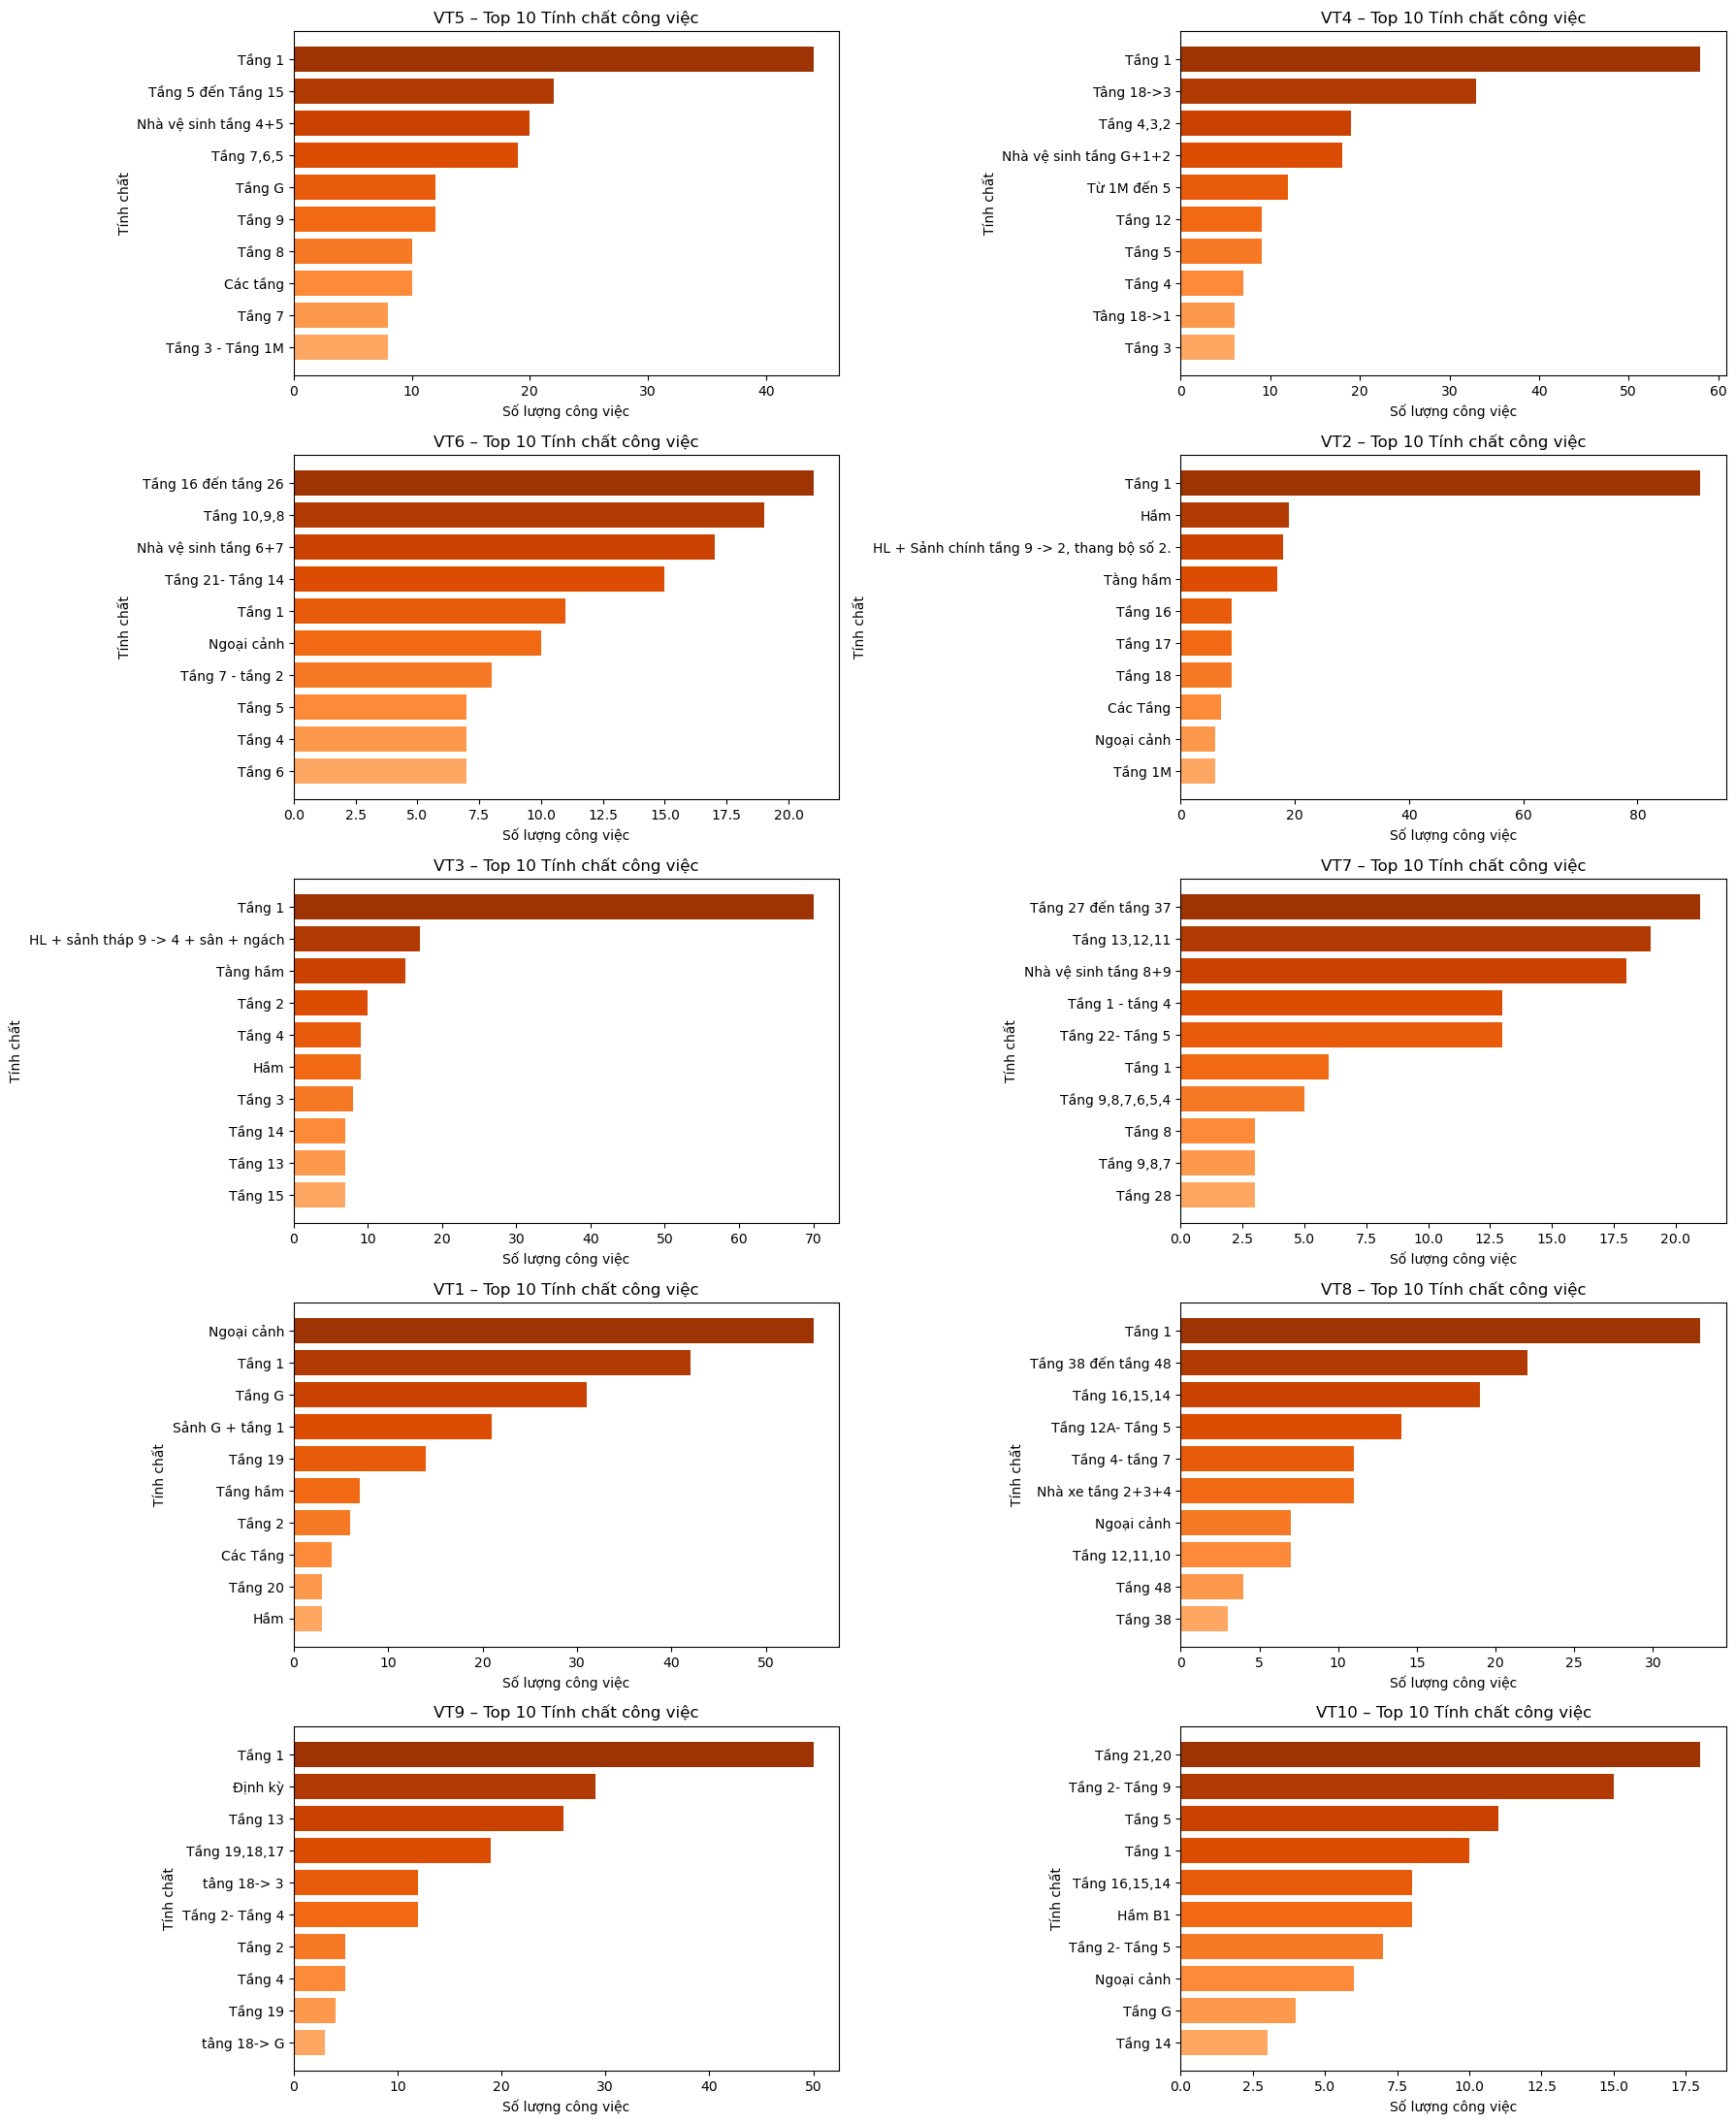

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


top10_positions = df["Vị trí thực hiện"].value_counts().head(10).index
df_top = df[df["Vị trí thực hiện"].isin(top10_positions)]

# 2️⃣ Vẽ biểu đồ
fig, axes = plt.subplots(5, 2, figsize=(18, 22))
axes = axes.flatten()

for i, vt in enumerate(top10_positions):
    df_vt = df_top[df_top["Vị trí thực hiện"] == vt]
    
    top10_nature = (
        df_vt["Vị trí Tầng/ Hầm"]
        .value_counts()
        .head(10)
        .sort_values()
    )
    
    values = top10_nature.values
    colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(values)))
    
    ax = axes[i]
    ax.barh(top10_nature.index, values, color=colors)
    ax.set_title(f"{vt} – Top 10 Tính chất công việc")
    ax.set_xlabel("Số lượng công việc")
    ax.set_ylabel("Tính chất")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import re
from pyvi import ViTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# =============================
# 1. ĐỌC DỮ LIỆU
# =============================
# df = pd.read_excel("LLV_tong_hop_chuan_hoa.xlsx", dtype=str)
df = df.dropna(subset=['Vị trí thực hiện', 'Mô tả chi tiết công việc'])

# =============================
# 2. ĐỌC STOPWORDS
# =============================
with open("vietnamese-stopwords-dash.txt", "r", encoding="utf-8") as f:
    stopwords = set([line.strip() for line in f if line.strip()])

# =============================
# 3. HÀM LÀM SẠCH + TOKENIZE
# =============================
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễ'
                  r'ìíịỉĩòóọỏõôồốộổỗơờớợởỡ'
                  r'ùúụủũưừứựửữỳýỵỷỹđ\s]', ' ', text)

    # Tokenize bằng PyVi (tạo cụm từ có nghĩa)
    text = ViTokenizer.tokenize(text)

    tokens = text.split()

    # Loại stopwords & token ngắn
    tokens = [
        token for token in tokens
        if token not in stopwords and len(token) > 2
    ]

    return " ".join(tokens)

# =============================
# 4. HÀM VẼ WORD CLOUD CHO 1 VỊ TRÍ
# =============================
def plot_wordcloud_by_position(position_name):
    df_pos = df[df['Vị trí thực hiện'] == position_name]

    if df_pos.empty:
        print(f"❌ Không có dữ liệu cho vị trí: {position_name}")
        return

    text_all = " ".join(df_pos['Mô tả chi tiết công việc'].astype(str))
    text_clean = preprocess_text(text_all)

    if len(text_clean.strip()) == 0:
        print(f"⚠️ Không còn từ có ý nghĩa sau khi lọc cho vị trí: {position_name}")
        return

    wordcloud = WordCloud(
        width=1000,
        height=600,
        background_color="white",
        max_words=150,
        collocations=False,
        font_path="arial.ttf"  # ⚠️ đổi font nếu cần (bắt buộc cho tiếng Việt)
    ).generate(text_clean)

    plt.figure(figsize=(12, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud – Mô tả công việc tại {position_name}", fontsize=14)
    plt.tight_layout()
    plt.show()

# =============================
# 5. VÍ DỤ GỌI HÀM
# =============================
plot_wordcloud_by_position("VT3")
